In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
from itertools import combinations as comb
import matplotlib.pyplot as plt
import seaborn as sns

# shRNA Barcode Diversity

Below I'll find the number of bases which are different for every pair of shRNA barcodes

I'll also create a distribution of these edit distances.  If there are any barcodes which are 1 bp different from one another, I will create a table cataloging these potential conflicts.

In [41]:
shRNA_lib=pd.read_csv('total_shRNA_constructs_withBarcodes.csv',sep='\t',header=0)
shRNA_lib.head()

,index,Barcode Sequence,id,sense,antisense,dG,ddG,efficiency,geneName,diffdG,Forward Primer,Reverse Primer
0,CKMT1A|ENST00000413453_d4,CATGCAACCAGTCACACA,348.0,GGUAUUUGCUGACCUGUUU,AAACAGGUCAGCAAAUACC,-31.11,2.78,efficient,CKMT1A,0.61,TCAGTGATAGAGACGCTAGCGGTATTTGCTGACCTGTTTGTTAATA...,CCCAAACGCACGAATTCGAATGTGTGACTGGTTGCATGATCTCGTA...
1,CKMT1A|ENST00000413453_d6,ACGTCAACCAGTCACAGT,384.0,GCGACACAAUGGAUAUGAu,GUCAUAUCCAUUGUGUCGC,-31.13,2.77,efficient,CKMT1A,0.63,TCAGTGATAGAGACGCTAGCGCGACACAATGGATATGATGTTAATA...,CCCAAACGCACGAATTCGAAACTGTGACTGGTTGACGTATCTCGTA...
2,CKMT1A|ENST00000413453_d3,ACCACAACCAGTCACACA,336.0,GGAGACCUAUGAGGUAUUU,AAAUACCUCAUAGGUCUCC,-31.84,2.78,efficient,CKMT1A,1.34,TCAGTGATAGAGACGCTAGCGGAGACCTATGAGGTATTTGTTAATA...,CCCAAACGCACGAATTCGAATGTGTGACTGGTTGTGGTATCTCGTA...
3,CKMT1A|ENST00000413453_d9,TGCACAACCAGTCACAAC,426.0,GGAUCUAGAUGCCAGUAAA,UUUACUGGCAUCUAGAUCC,-31.87,2.78,efficient,CKMT1A,1.37,TCAGTGATAGAGACGCTAGCGGATCTAGATGCCAGTAAAGTTAATA...,CCCAAACGCACGAATTCGAAGTTGTGACTGGTTGTGCAATCTCGTA...
4,CKMT1A|ENST00000413453_d0,GTCACAACCAGTCACAGT,165.0,CCUCCGAAAGCACAACAAu,GUUGUUGUGCUUUCGGAGG,-32.25,2.61,efficient,CKMT1A,1.75,TCAGTGATAGAGACGCTAGCCCTCCGAAAGCACAACAATGTTAATA...,CCCAAACGCACGAATTCGAAACTGTGACTGGTTGTGACATCTCGTA...


In [14]:
#For each pair of sequences, compute the edit distance:
editDists=[]
for (_,s1),(_,s2) in comb(shRNA_lib.iterrows(),2):
    editDist=sum([i!=j for i,j in zip(s1['Barcode Sequence'],s2['Barcode Sequence'])])
    editDists.append({'s1':s1['index'],'s1_bc':s1['Barcode Sequence'],'s2':s2['index'],'s2_bc':s2['Barcode Sequence'],'editDist':editDist})

In [15]:
#Build DF:
editDists=pd.DataFrame(editDists)

## **Summary of Barcode Similarity**

In [39]:
editDists.editDist.describe().apply(lambda x: '%.0f' % x)

count    9638245
mean          13
std            3
min            4
25%           12
50%           14
75%           14
max           18
Name: editDist, dtype: object

### Takeaways: 

* The mean difference amongst barcodes is **13 bp**.
* The smallest difference between barcodes is **4 bp**.
* The majority of barcodes (within interquartile range) have a **12-14 bp** difference.

If there is a threshold for differences that is an issue, please let me know.

## Box & Whisker Plot of Barcode Differences:

Text(0, 0.5, 'Barcode Difference')

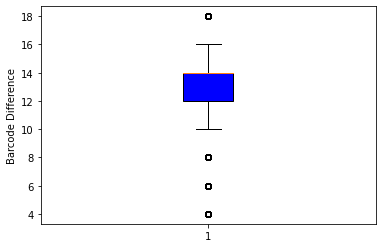

In [42]:
plt.boxplot(editDists.editDist,patch_artist=True,boxprops=dict(facecolor='blue'))
plt.ylabel('Barcode Difference')